# **Machine Learning-based Prediction of Drug Efficacy Targeting FEN1 for Cancer Therapy**

Current idea: Targeting FEN1 has been verified as an effective strategy in mono or combined treatment of cancer. We will build machine learning models to predict the efficacy of potential drugs towards FEN1. In this notebook, we will encode the chemical structure as **Morgan Fingerprint** and use **binary classification** approach to try to classify the drugs.

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9312813/

## **Collecting bioassay data**
We will collect bioassay data of FEN1 from PubChem database. Directly download the dataset from the website below.

https://pubchem.ncbi.nlm.nih.gov/bioassay/588795

In [1]:
# import library
import pandas as pd

df = pd.read_csv('/kaggle/input/aid588795/AID_588795_datatable_all.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (0,9,10,11,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **Data pre-processing**

### **Data cleaning**

In [2]:
df.dropna(subset=['PUBCHEM_EXT_DATASOURCE_SMILES' ], inplace=True)
df.reset_index(drop=True, inplace=True)
df_sub = df[['PUBCHEM_CID', 'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_ACTIVITY_SCORE', 'Phenotype', 'Potency', 'Efficacy', 'Fit_LogAC50']]
display(df_sub)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50
0,50897788.0,CNCC1=NC2=C(C=C(C=C2)Cl)C(=N1)C3=CC=CN3,Inconclusive,10.0,Inhibitor,79.4328,55.1668,-4.1
1,2733516.0,CCSC(=NC1=CC=C(C=C1)C(F)(F)F)N.Cl,Inactive,0.0,Inactive,NaN,NaN,NaN
2,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5
3,3240102.0,CC1=CC=CC=C1CN2C=NC3=C(C2=O)C=NN3C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN
4,53314907.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C(=CC=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
391248,655874.0,CC1CCC2=C(C1)SC(=N2)NC(=O)C3=CC(=NN3C)C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN
391249,5745.0,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC(=O)[C@H]...,Inactive,0.0,Inactive,NaN,NaN,NaN
391250,659648.0,COC1=CC2=C(C=C1)[N+](=O)C3=C(N2[O-])CCC3,Inactive,0.0,Inactive,NaN,NaN,NaN
391251,5389333.0,CCN(CC)CCN1C(/C(=C(/C2=CC=C(C=C2)C)\O)/C(=O)C1...,Inactive,0.0,Inactive,NaN,NaN,NaN


## **Our classification**

In [3]:
haha = []
for i in range(len(df_sub)):
    if df_sub.loc[i, 'Phenotype'] == 'Inhibitor':
        haha.append('Positive')
    else:
        haha.append('Negative')
        
df_sub['Inhibitor'] = haha
display(df_sub)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,50897788.0,CNCC1=NC2=C(C=C(C=C2)Cl)C(=N1)C3=CC=CN3,Inconclusive,10.0,Inhibitor,79.4328,55.1668,-4.1,Positive
1,2733516.0,CCSC(=NC1=CC=C(C=C1)C(F)(F)F)N.Cl,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5,Positive
3,3240102.0,CC1=CC=CC=C1CN2C=NC3=C(C2=O)C=NN3C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
4,53314907.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C(=CC=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
...,...,...,...,...,...,...,...,...,...
391248,655874.0,CC1CCC2=C(C1)SC(=N2)NC(=O)C3=CC(=NN3C)C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
391249,5745.0,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC(=O)[C@H]...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
391250,659648.0,COC1=CC2=C(C=C1)[N+](=O)C3=C(N2[O-])CCC3,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
391251,5389333.0,CCN(CC)CCN1C(/C(=C(/C2=CC=C(C=C2)C)\O)/C(=O)C1...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative


### **Positive compounds**
We consider all active compounds and part of inconclusive compounds as positive compounds that can **inhibit FEN1**.

In [4]:
df_active = df_sub.loc[df_sub['PUBCHEM_ACTIVITY_OUTCOME'] == 'Active', :].reset_index(drop=True)
df_inconclusive = df_sub.loc[df_sub['PUBCHEM_ACTIVITY_OUTCOME'] == 'Inconclusive', :]
df_inconclusive_sampled = df_inconclusive.sample(n=len(df_active), random_state=0)
# df_positive = pd.concat([df_active, df_inconclusive_sampled]).reset_index(drop=True)
df_positive = df_active
display(df_positive)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5,Positive
1,6623240.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=CC=C(C=C3)Cl,Active,80.0,Inhibitor,39.8107,93.9578,-4.4,Positive
2,16196968.0,CC1=CC(=C(C(=C1)O)OC2=CC(=CC(=C2O)O)C)O,Active,41.0,Inhibitor,50.1187,92.431,-4.3,Positive
3,160115.0,CC1CC(=O)C2=C(O1)C=C3C(=C2O)C(=CC(=C3C4=C(C=C(...,Active,82.0,Inhibitor,14.1254,101.357,-4.85,Positive
4,638759.0,C1=CC(=CC=C1C(=O)CCO)O,Active,81.0,Inhibitor,22.3872,97.3288,-4.65,Positive
...,...,...,...,...,...,...,...,...,...
1361,2813732.0,CCOC(=O)C1=C(N(C(=S)S1)C2=CC=CC=C2)NC(=O)C,Active,42.0,Inhibitor,79.4328,103.574,-4.1,Positive
1362,2732121.0,CC(C)C1=CC=C(C=C1)N2C(=O)/C(=C/N(C)C)/SC2=S,Active,40.0,Inhibitor,31.6228,190.148,-4.5,Positive
1363,2816501.0,C1=COC(=C1)C2=CC(=NC3=C2C(=C(O3)C(=O)NN)N)C4=C...,Active,41.0,Inhibitor,50.1187,71.2702,-4.3,Positive
1364,6364952.0,COC1=CC=C(C=C1)/C=C/2\C(=O)N(C(=S)S2)C3=CC=C(C...,Active,41.0,Inhibitor,50.1187,117.206,-4.3,Positive


### **Negative compounds**
We consider all inactive compounds as negative compounds, which are either **activator** or have **no effect on FEN1**. To balance the data, we will randomly sample from the negative compounds and choose a number of negative compounds equal to the number of positive compounds in the dataset.

In [5]:
df_negative = df_sub.loc[df_sub['Inhibitor'] == 'Negative', :].reset_index(drop=True)
display(df_negative)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,2733516.0,CCSC(=NC1=CC=C(C=C1)C(F)(F)F)N.Cl,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1,3240102.0,CC1=CC=CC=C1CN2C=NC3=C(C2=O)C=NN3C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2,53314907.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C(=CC=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
3,44142107.0,CC1=C(C(=C(C=C1)F)CN2C=NC3=C(C2=O)C=NN3C(C)(C)...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
4,53314908.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C=CC(=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
...,...,...,...,...,...,...,...,...,...
382224,655874.0,CC1CCC2=C(C1)SC(=N2)NC(=O)C3=CC(=NN3C)C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
382225,5745.0,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC(=O)[C@H]...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
382226,659648.0,COC1=CC2=C(C=C1)[N+](=O)C3=C(N2[O-])CCC3,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
382227,5389333.0,CCN(CC)CCN1C(/C(=C(/C2=CC=C(C=C2)C)\O)/C(=O)C1...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative


In [6]:
df_negative_sampled = df_negative.sample(n=len(df_active), random_state=0).reset_index(drop=True)
display(df_negative_sampled)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,5309773.0,CCN(CC)C(=O)C1CCC(CC1)CNS(=O)(=O)C2=CC=CC3=C2N...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1,9622798.0,C1CC(C(=O)NC1)C(=O)N/N=C/C2=CC(=CC=C2)[N+](=O)...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2,1292315.0,C1=CC=C(C=C1)C(C2=CC=CC=C2)NC(=O)C3=CC=C(O3)Br,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
3,16032653.0,CC1=CC(=C2C(=C1)SC(=N2)N3CCN(CC3)C(=O)C4=CC5=C...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
4,16008216.0,CC1=CC(=C(C=C1)NC(=O)CN(C2=CC(=CC(=C2)C)C)S(=O...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
...,...,...,...,...,...,...,...,...,...
1361,2948675.0,C1CC(OC1)CNC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1362,5344764.0,CCOC1=C(C=CC(=C1)/C=C(\C#N)/C(=O)NCC2CCCO2)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1363,16023553.0,COCCNC1=C2C(=NOC2=NC=N1)C3=CC=C(C=C3)F,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1364,53315068.0,CC(=O)NNC(=C)C1=CC=C(C=C1)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative


## **Data processing**

### **Calculate Morgan fingerprint**
Morgan fingerprints enable mapping of certain structures of the molecule within certain radius of organic molecule bonds. Here, we will use radius 2 and length 1024.

In [7]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 32.4 MB/s eta 0:00:00


In [8]:
# importing library
import numpy as np
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import AllChem

In [9]:
# Function to convert smile to morgan fingerprint. 
def fingerprint(smile, radius, length):
    mol = Chem.MolFromSmiles(smile)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=length)
    return fp

In [10]:
df_sample = pd.concat([df_positive, df_negative_sampled]).reset_index(drop=True)
df_sample

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5,Positive
1,6623240.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=CC=C(C=C3)Cl,Active,80.0,Inhibitor,39.8107,93.9578,-4.4,Positive
2,16196968.0,CC1=CC(=C(C(=C1)O)OC2=CC(=CC(=C2O)O)C)O,Active,41.0,Inhibitor,50.1187,92.431,-4.3,Positive
3,160115.0,CC1CC(=O)C2=C(O1)C=C3C(=C2O)C(=CC(=C3C4=C(C=C(...,Active,82.0,Inhibitor,14.1254,101.357,-4.85,Positive
4,638759.0,C1=CC(=CC=C1C(=O)CCO)O,Active,81.0,Inhibitor,22.3872,97.3288,-4.65,Positive
...,...,...,...,...,...,...,...,...,...
2727,2948675.0,C1CC(OC1)CNC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2728,5344764.0,CCOC1=C(C=CC(=C1)/C=C(\C#N)/C(=O)NCC2CCCO2)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2729,16023553.0,COCCNC1=C2C(=NOC2=NC=N1)C3=CC=C(C=C3)F,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2730,53315068.0,CC(=O)NNC(=C)C1=CC=C(C=C1)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative


In [11]:
# model input (Morgan fingerprint)
X = np.empty((len(df_sample), 1024))
for i in tqdm(range(len(df_sample))):
    fp = fingerprint(df_sample.loc[i, 'PUBCHEM_EXT_DATASOURCE_SMILES'], 2, 1024)
    X[i, :] = np.array(fp)
display(X)
display(X.shape)

100%|██████████| 2732/2732 [00:04<00:00, 554.89it/s]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(2732, 1024)

### **Model output**

In [12]:
y = []
for i in df_sample.index:
    if df_sample.loc[i, 'Inhibitor'] == 'Positive':
        y.append(1)
    else:
        y.append(0)
display('The number of positive compounds: ' + str(y.count(1)))
display('The number of negative compounds: ' + str(y.count(0)))

'The number of positive compounds: 1366'

'The number of negative compounds: 1366'

In [13]:
# y = []
# for i in df_sample.index:
#     if df_sample.loc[i, 'PUBCHEM_ACTIVITY_OUTCOME'] == 'Active':
#         y.append(1)
#     elif df_sample.loc[i, 'PUBCHEM_ACTIVITY_OUTCOME'] == 'Inactive':
#         y.append(0)
# display('The number of active compounds: ' + str(y.count(1)))
# display('The number of inactive compounds: ' + str(y.count(0)))

## **Model training**

### **Fitting models - All compounds**

In [14]:
# # All compounds
# X_all = np.load('/kaggle/input/aid588795/X.npy')
# X_all.shape

In [15]:
# y_all = []
# for i in df_sub.index:
#     if df_sub.loc[i, 'Inhibitor'] == 'Positive':
#         y_all.append(1)
#     else:
#         y_all.append(0)
# display('The number of positive compounds: ' + str(y_all.count(1)))
# display('The number of negative compounds: ' + str(y_all.count(0)))

In [16]:
# # Spliting dataset
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0, shuffle=True)

In [17]:
# from sklearn.linear_model import SGDClassifier
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=10000, tol=1e-3))
# sgd_clf.fit(X_train, y_train)

In [18]:
# import scikitplot as skplt
# y_pred = sgd_clf.predict(X_test)
# skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = 'SGD Classifier')

In [19]:
# y_pred_prob = sgd_clf.predict_proba(X_test)
# skplt.metrics.plot_roc(y_test, y_pred_prob)

In [20]:
# from sklearn.metrics import confusion_matrix

# y_pred = sgd_clf.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# (tn, fp, fn, tp) = cm.ravel()

# false_positive_rate = fp / (fp + tn)
# false_negative_rate = fn / (tp + fn)
# display('False positive rate: ' + str(false_positive_rate))
# display('False negative rate: ' + str(false_negative_rate))

### **Fitting models - All active compounds and sampled inactive compounds**

In [21]:
# Spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [22]:
## Construct models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

svc_lin = SVC(kernel = "linear", probability=True, random_state=0)
svc_lin.fit(X_train, y_train)

svc_rbf = SVC(kernel = "rbf", probability=True, random_state=0)
svc_rbf.fit(X_train, y_train)

rf_clf = RandomForestClassifier(n_estimators = 500, random_state = 0)
rf_clf.fit(X_train, y_train)

gbm_clf = GradientBoostingClassifier(n_estimators = 500, random_state = 0)
gbm_clf.fit(X_train, y_train)

knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
## Measure model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

f1_ls = []
fdr_ls = []
fnr_ls = []

models = [log_reg, svc_lin, svc_rbf, rf_clf, gbm_clf, knn_clf]

for model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    (tn, fp, fn, tp) = cm.ravel()
    
    f1_ls.append(f1_score(y_test, y_pred))
    fdr_ls.append(fp / (tp + fp))
    fnr_ls.append(fn / (tp + fn))

df_acc_met = pd.DataFrame(list(zip(['Logistic regression', 'SVR Linear', 'SVR rbf', 'Random forest', 'Gradient boosting', 'KNeighbors'], f1_ls, fdr_ls, fnr_ls)), 
                                   columns = ['Model', 'F1 score', 'FDR', 'FNR'])
df_acc_met

,Model,F1 score,FDR,FNR
0,Logistic regression,0.809981,0.182171,0.197719
1,SVR Linear,0.777989,0.223485,0.220532
2,SVR rbf,0.853175,0.107884,0.182510
3,Random forest,0.861660,0.102881,0.171103
4,Gradient boosting,0.847525,0.115702,0.186312
5,KNeighbors,0.787479,0.305233,0.091255


In [24]:
! pip install dataframe-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 26.8 MB/s eta 0:00:00


In [25]:
import dataframe_image as dfi

dfi.export(df_acc_met, 'df_acc_met.png', table_conversion='matplotlib')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

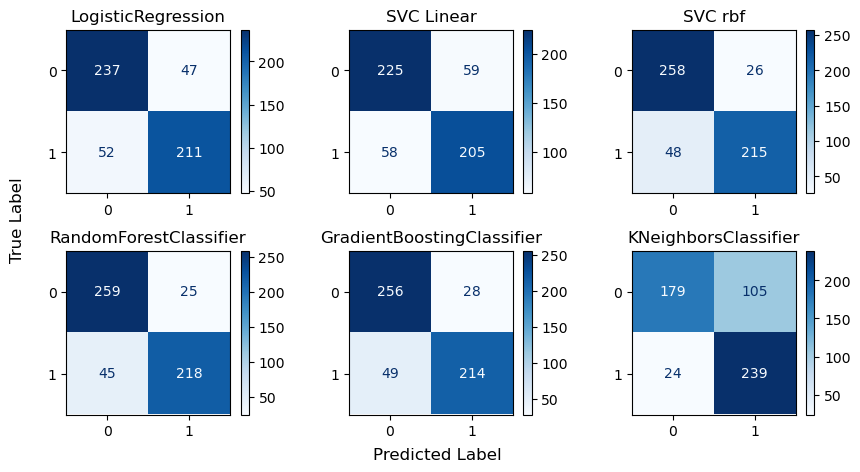

In [26]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.35, wspace=0.35)
fig.set_size_inches(10, 5)

count = 0
for model, ax in zip(models, axes.flatten()):
    plot_confusion_matrix(model, X_test, y_test, ax=ax, cmap='Blues')
    if type(model).__name__ == 'SVC':
        if count == 0:       
            ax.title.set_text('SVC Linear')
            count += 1
        else:
            ax.title.set_text('SVC rbf')
    else:
        ax.title.set_text(type(model).__name__)
    
    ax.set(xlabel=None)
    ax.set(ylabel=None)

fig.text(0.5, 0.03, "Predicted Label", ha="center", va="center", fontsize=12)
fig.text(0.08, 0.5, "True Label", ha="center", va="center", rotation=90, fontsize=12)
plt.savefig('confusion_matrix.png')
plt.show()

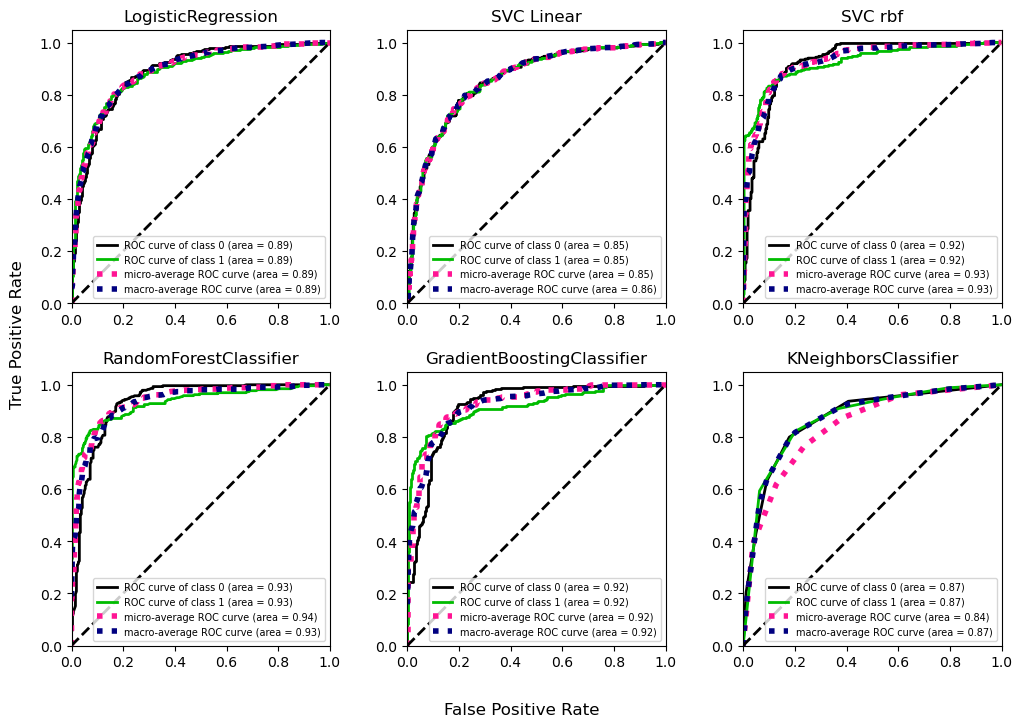

In [27]:
import scikitplot as skplt

fig, axes = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.25, wspace=0.3)
fig.set_size_inches(12, 8)

count = 0
for model, ax in zip(models, axes.flatten()):
    y_pred_prob = model.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_pred_prob, ax=ax)
    if type(model).__name__ == 'SVC':
        if count == 0:       
            ax.title.set_text('SVC Linear')
            count += 1
        else:
            ax.title.set_text('SVC rbf')
    else:
        ax.title.set_text(type(model).__name__)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.legend(loc=4, prop={'size': 7})

fig.text(0.5, 0.03, "False Positive Rate", ha="center", va="center", fontsize=12)
fig.text(0.08, 0.5, "True Positive Rate", ha="center", va="center", rotation=90, fontsize=12)     

plt.savefig('roc_curve.png')
plt.show()

## **Prediction**

In [28]:
# # Download cancer drug list
# !wget https://acfdata.coworks.be/cancerdrugsdb.txt

In [29]:
df_drugs = pd.read_csv('/kaggle/input/aid588795/cancerdrugsdb.txt', delimiter = '\t')
df_drugs.dropna(subset=['ChEMBL'], inplace=True)

In [30]:
!pip install pubchempy

  Preparing metadata (setup.py) ... - done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=863c9e902b8284322c751f5d5cbcafbec841f9dc5d2c6e29ae8f45e60a196e5d
  Stored in directory: /root/.cache/pip/wheels/e5/36/89/7ccdf7e0f95a89a26a1485e2cb6aca25ad7607b32b90a5f08d
Successfully built pubchempy


In [31]:
import pubchempy as pcp

drug_ls = []
smile_ls = []

for i in tqdm(df_drugs.index):
    compound = pcp.get_compounds(df_drugs.loc[i, 'Product'], 'name')
    if len(compound) != 0:
        smile = compound[0].isomeric_smiles  ## We will use the first compound found for each product for simplicity
        smile_ls.append(smile)
        drug_ls.append(df_drugs.loc[i, 'Product'])

df_drugs_sub = pd.DataFrame(list(zip(drug_ls, smile_ls)), columns = ['Product', 'smile'])
display(df_drugs_sub)

df_drugs_sub.to_csv('df_drugs_sub.csv', index = False)

100%|██████████| 292/292 [02:12<00:00,  2.20it/s]


,Product,smile
0,Abemaciclib,CCN1CCN(CC1)CC2=CN=C(C=C2)NC3=NC=C(C(=N3)C4=CC...
1,Abiraterone,C[C@]12CC[C@@H](CC1=CC[C@@H]3[C@@H]2CC[C@]4([C...
2,Acalabrutinib,CC#CC(=O)N1CCC[C@H]1C2=NC(=C3N2C=CN=C3N)C4=CC=...
3,Aclarubicin,CC[C@]1(C[C@@H](C2=C(C3=C(C=C2[C@H]1C(=O)OC)C(...
4,Adagrasib,CN1CCC[C@H]1COC2=NC3=C(CCN(C3)C4=CC=CC5=C4C(=C...
...,...,...
208,Vinflunine,CC[C@@]12C=CCN3[C@@H]1[C@]4(CC3)[C@H]([C@]([C@...
209,Vinorelbine,CCC1=C[C@H]2C[C@@](C3=C(CN(C2)C1)C4=CC=CC=C4N3...
210,Vismodegib,CS(=O)(=O)C1=CC(=C(C=C1)C(=O)NC2=CC(=C(C=C2)Cl...
211,Vorinostat,C1=CC=C(C=C1)NC(=O)CCCCCCC(=O)NO


### **Classify the cancer drugs**

In [32]:
X_drugs = np.empty((len(df_drugs_sub), 1024))
for i in tqdm(range(len(df_drugs_sub))):
    fp = fingerprint(df_drugs_sub.loc[i, 'smile'], 2, 1024)
    X_drugs[i, :] = np.array(fp)
display(X_drugs)
display(X_drugs.shape)

y_drugs = rf_clf.predict(X_drugs)

100%|██████████| 213/213 [00:00<00:00, 515.03it/s]


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(213, 1024)

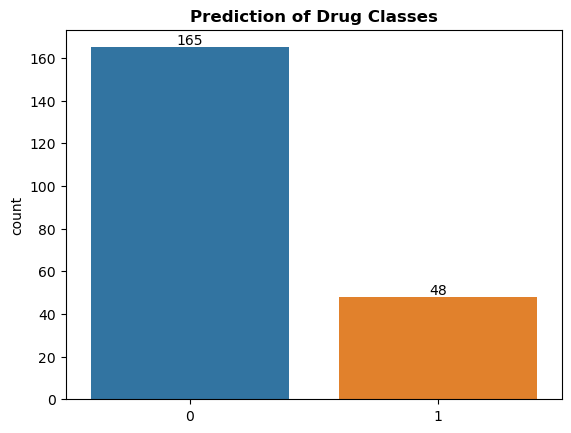

In [33]:
import seaborn as sns
ax = sns.countplot(x=y_drugs)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext = (0, 5), 
                    textcoords='offset points',
                    ha ='center', va='center')
ax.set_title('Prediction of Drug Classes', weight = 'bold')
plt.savefig('drugs_result.png')
plt.show()

In [34]:
drugs_pos_ls = []
for i in df_drugs_sub.index:
    if y_drugs[i] == 1:
        drugs_pos_ls.append(df_drugs_sub.loc[i, 'Product'])

df_pred_result = pd.DataFrame(drugs_pos_ls)
df_pred_result.rename(columns = {0:'name'}, inplace = True)
display(df_pred_result)
df_pred_result.to_csv('df_pred_result.csv', index = False)

,name
0,Aclarubicin
1,Altretamine
2,Amrubicin
3,Amsacrine
4,Arsenic Trioxide
5,Asparaginase
6,Azacitidine
7,Belotecan
8,Bosutinib
9,Carboplatin


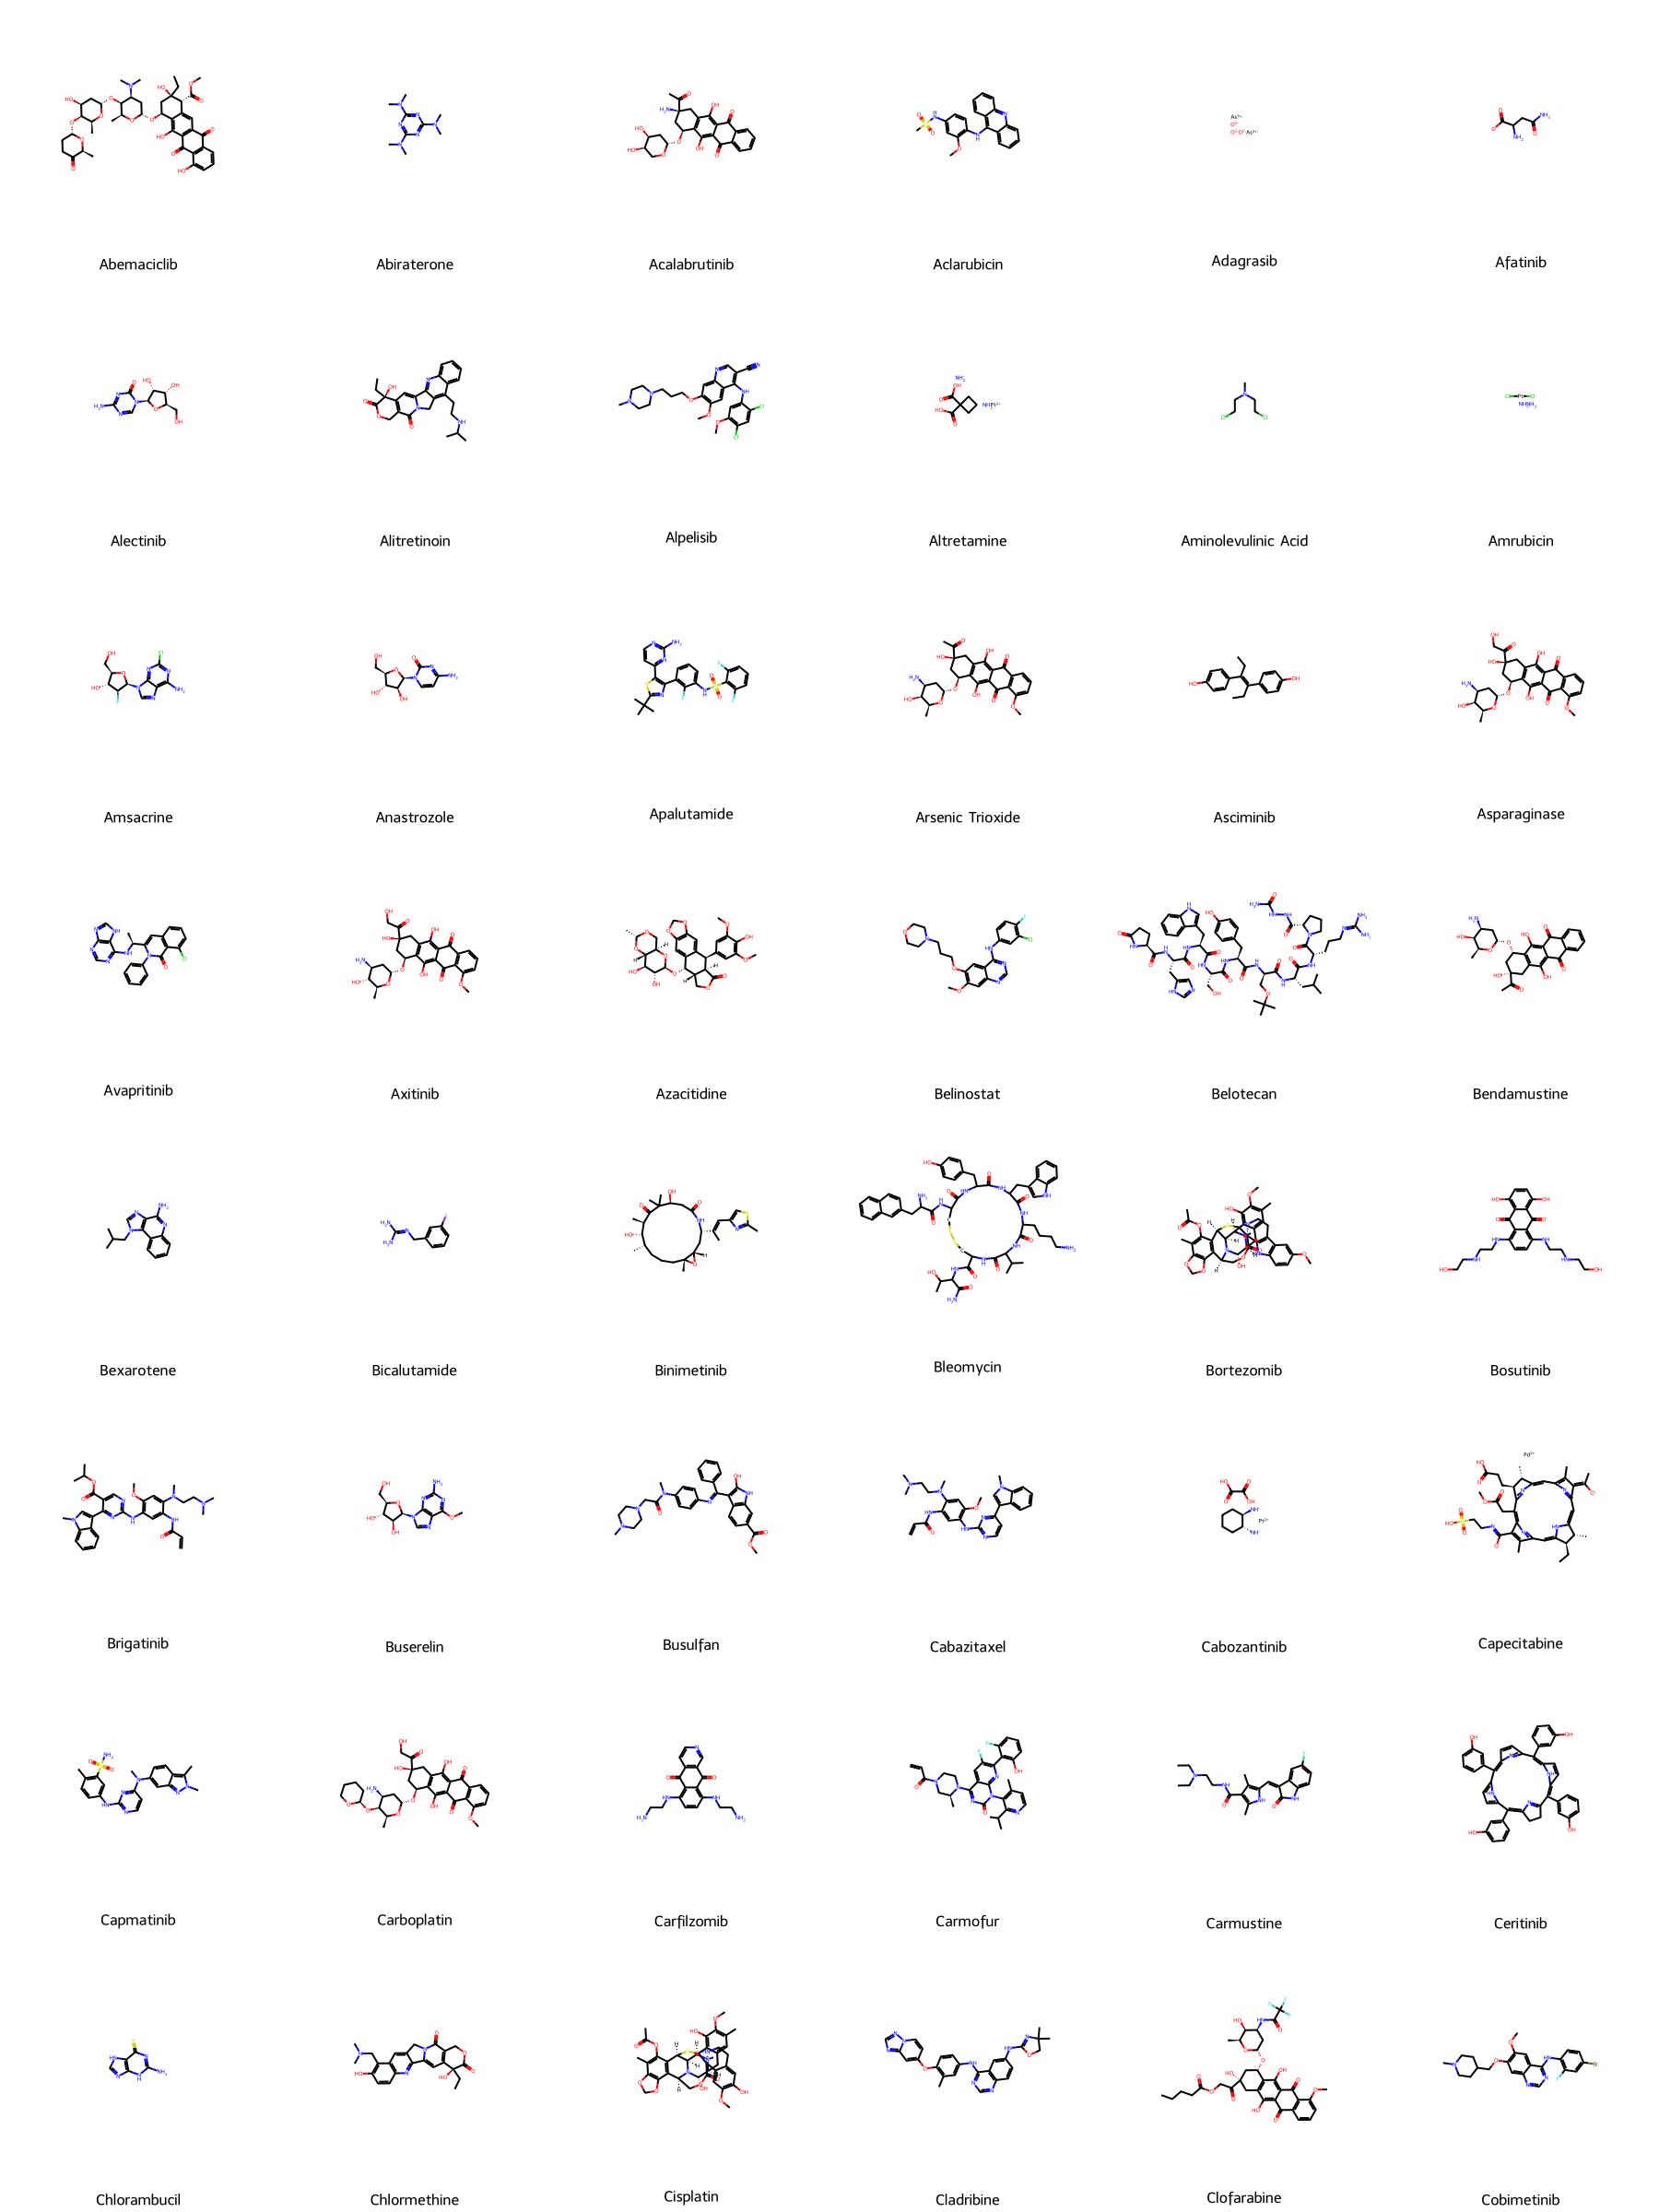

In [35]:
# Plot the positive drugs
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

count = 0
mol_ls = []
for i in df_drugs_sub.index:
    if y_drugs[i] == 1:
        smile = df_drugs_sub.loc[i, 'smile']
        mol = Chem.MolFromSmiles(smile)
        mol_ls.append(mol)
        count += 1

img = Draw.MolsToGridImage(mol_ls, molsPerRow = 6, subImgSize = (300, 300), legends = [df_drugs_sub.loc[i, 'Product'] for i in df_drugs_sub.index])
img